# Сборный проект.



# Описание проекта:
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# 1. Открытие таблицы и изучение данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt #библиотека для построения диаграмм
import seaborn as sns
from scipy import stats as st
import numpy as np


game = pd.read_csv('/datasets/games.csv')#вывод 20 cтрок таблицы на экран
display(game.head(20))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


В столбце Years_of_Replase некорректно указаны данные, нужно приветси год к целому числу. Данные в столбцах Critic_Score b User_Score должны иметь целочисленные значения, так как это оценки. Также нужно приветси к нижннму регистру название столбцов, разобраться в пропусках  и типе данных в иаблице.

In [2]:
game.info() # общая информация о таблице
game_duplic = game.duplicated().sum()

print('Число дубликатов в таблице:', game_duplic) #поиск количества явных дубликатов в фрейме

display(game.isna().sum()) # найдем пропущенные значения в столбцах
game[game['Name'].isna()]# посмотрим пропуски по каждому столбцу где они встречаются



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
Число дубликатов в таблице: 0


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [3]:
game[game['Genre'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [4]:
game[game['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
game[game['Critic_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
game[game['User_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
game[game['Rating'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Вывод:
В таблице 16715 строк,  при этом есть строки в которых некорректные типы данных, их нужно изменить.
В столбцах Name и Genre присутствуют пару строк с пропусками, видно, что это одни и теже игры.
Также В трех последних столбцах большое количество пропущенных значений, нужно разобраться в причине пропусков, они не случайны.
Пропуски в столбце Year_of_Release образованы потомк что скорее всего данные просто отсутвуют.
Название столбцов фрейма нужно приветси к нижнему регистру. 
Явные дубликаты в таблице отсутствуют.

# 2. Подготовка данных.

In [8]:
game = game.rename(columns={'Name': 'name','Platform':'platform', 'Year_of_Release':'year_of_release', 'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'})
print(game.columns) #приведем название столбцов к нижнему регистру и проверим произведенные изменения.

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [9]:
game = game.dropna(subset = ['name']) 

game = game.dropna(subset = ['year_of_release']) 
game['year_of_release'] = game['year_of_release'].astype('int')

display(game.isna().sum()) # проверим количество пропусков после замены
game.info() # проверка изменения типа данных и корректного количества строк

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Удалим строки с пропусками из столбца name их всего 2, автоматически убрались пропуски из столца genre, так как данные представлены о тех же играх.Причина отсутвия года непонятна, количество строк с пропущенными значениями в данном столбце примерно 1.5% от общего количество, на анализ данных удаление строк не повлияет. При этом, игры без года создания не нужны для анализа данных.

Чтобы не потерять важные данные в столбце year_of_release, заменим пропуски на 0 и сразу произведем замену типа данных на целое число,так как это год выпуска.


In [10]:
display(game['critic_score'].describe())
print(game.corr())



display(game.isna().sum())
game.info()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

                 year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
year_of_release         1.000000 -0.092326  0.004045 -0.168477     0.037821   
na_sales               -0.092326  1.000000  0.766546  0.451162     0.638479   
eu_sales                0.004045  0.766546  1.000000  0.435894     0.722679   
jp_sales               -0.168477  0.451162  0.435894  1.000000     0.291562   
other_sales             0.037821  0.638479  0.722679  0.291562     1.000000   
critic_score            0.011411  0.240083  0.221276  0.153474     0.198410   

                 critic_score  
year_of_release      0.011411  
na_sales             0.240083  
eu_sales             0.221276  
jp_sales             0.153474  
other_sales          0.198410  
critic_score         1.000000  


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Посмотрим среднее и степень разброса относительно среднего для понимания чем заменять пропуски в столбце, посмотрим какая зависимость мужду параметрами датафрейма.

Получилось, что самая сильная взаимосвязь между оценкой критиков и пользовательской оценкой, нам  это ничего не дает, Оставим их.

In [11]:

game['user_score'].unique() 
game['user_score'] = pd.to_numeric(game['user_score'],errors ='coerce') 

game['user_score'] = game['user_score'].round(1) 
game.loc[:,'user_score']


game.info()
display(game.head(20))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Вперечне значений столбца user_score присутствуют пропуски, а также значение tbd.Полное наименование To Be Determined (будет определено), соответсвенно данных по играм с данным статусом еще нет, следовательно tbd можно заменить на NaN.
Ссделаем замену типа данных на int,все некорректные значения будут заменены на NaN.Округлим значение в столбце user_score до 1 знака после запятой. Пропущеные значения в столбце оставляем, так как их много, проверм прошла ли совершенная замена.

In [12]:
# можно попробовать найти закономерность между рэйтингом и другими параметрами игры, чтобы на основе этих данных восстановить значения рейтинга.
display(game.tail(20))
print(game['rating'].unique()) #просмотр всех значений рейтинга

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.00,0.0,67.0,NaN,E
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.0,61.0,5.8,T
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.00,0.0,53.0,NaN,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.00,0.0,48.0,NaN,E
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.0,60.0,7.2,E10+
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.0,NaN,NaN,E


['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [13]:
game['rating'].value_counts()

genre_list = game['genre'].unique()
for genre in genre_list:
    print('Популярные оценки для жанра:', genre)
    rating_value_counts =game[game['genre'] == genre]['rating'].value_counts()
    print(rating_value_counts)
    #увидели какие рейтинги являются самыми популярными для каждого жанра.
    

Популярные оценки для жанра: Sports
E       1162
T        195
E10+     105
M         16
Name: rating, dtype: int64
Популярные оценки для жанра: Platform
E       354
E10+    141
T        63
M         3
Name: rating, dtype: int64
Популярные оценки для жанра: Racing
E       576
T       167
E10+     95
M        18
Name: rating, dtype: int64
Популярные оценки для жанра: Role-Playing
T       415
M       161
E10+    111
E        83
Name: rating, dtype: int64
Популярные оценки для жанра: Puzzle
E       284
E10+     42
T        10
Name: rating, dtype: int64
Популярные оценки для жанра: Misc
E       449
T       228
E10+    166
M        13
EC        5
K-A       1
Name: rating, dtype: int64
Популярные оценки для жанра: Shooter
M       553
T       340
E10+     56
E        47
Name: rating, dtype: int64
Популярные оценки для жанра: Simulation
E       321
T       186
E10+     47
M         5
Name: rating, dtype: int64
Популярные оценки для жанра: Action
T       670
M       596
E10+    468
E       410
E

Расшифровка рейтнгов в столбце rating:

EC» («Early childhood») — «Для детей младшего возраста».
«E» («Everyone») — «Для всех»
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
«T» («Teen») — «Подросткам»
«M» («Mature») — «Для взрослых»
«AO» («Adults Only 18+») — «Только для взрослых»
«RP» («Rating Pending») — «Рейтинг ожидается»
K-A - старый вариант маркировки E (for everyone)

Пропуски в рейтинге можно охарактеризовать как случайные.Для того, чтобы они не мешали дальнейшим расчетам, заменим пропуски на пустоту ''

In [14]:
# сделаем замену Nan на пустоту в колонке рейтнг
game['rating'] = game['rating'].fillna('')
# в названиях рейтингов есть несколько дублирцющих друг друга названий, их нужно объединить 
game.loc[game['rating'] == 'RP', 'rating'] = ' ' #сделаем замену на пустоту, так как статус рейтинг находится в ожидании RP - это отсутвие рейтинга
game.loc[game['rating'] =='K-A', 'rating'] = 'E'
game.loc[game['rating'] == 'AO', 'rating'] = 'M'




In [15]:
game.info()
game['rating'].value_counts()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


        6676
E       3924
T       2905
M       1537
E10+    1393
EC         8
           1
Name: rating, dtype: int64

Вывод:
Таким образом, в столбце rating убрали задвоение информации, а также заменили пропуски на отсутствие значения, так как скорее всего данные просто не были представлены издателями игр.


In [16]:
game['world_sales'] = game.loc[:, 'na_sales': 'other_sales'].sum(axis = 1)
display(game.head()) #проверили добавление столбца world_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,,31.38


# 3. Исследовательский анализ данных


,game_count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


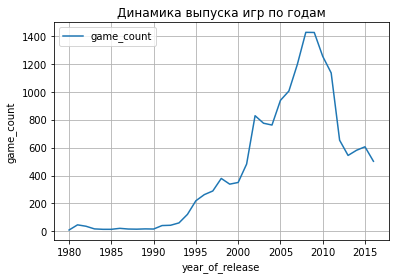

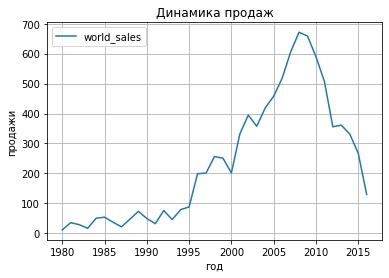

In [17]:
#посмотрим сколько игр выпускалось в разыне годы.
game['year_of_release'].value_counts() #самый популярный год для выпуска игр - 2008 и 2009. Посмотрим как игры продавались по годам 

game_year_pivot_table = pd.pivot_table(game, index='year_of_release', values='name', aggfunc='count') # выведим сводную таблицу на сновании которйо построим график
game_year_pivot_table.columns = ['game_count']
display(game_year_pivot_table)
#построим график для наглядности
game_year_pivot_table.plot(title = 'Динамика выпуска игр по годам', xlabel = 'year_of_release', ylabel = 'game_count', grid = True)
game_sales_pivot_table = pd.pivot_table(game, index = 'year_of_release', values = 'world_sales', aggfunc = 'sum').plot(title = 'Динамика продаж', xlabel = 'год', ylabel = 'продажи', grid = True) #динамика продаж по годам

Вывод: по графику видно, что в период с 1980 до начала 2000-х выпускалось очень мало игр, все-таки это тесяно связано с научно-техническим прогрессом в области компьютерной техники, поэтому уровень продаж в этот период не существенный, игроков мало, оценки малочислены. Технологичсекий скачок в 2000-х годах стал драйвером для популиризации компьютерных игр, к 2008 года выпуск достиг максимального значения. После 2008 года наблюдается резкий спад по количеству выпущенных игр, возможно это связано с усложнением самого продутка, что начало требовать большего количества лет на разработки, так же след. технологический скачок привел к появлению других устройств более компактных, чем копьютеры, что также повлияло на количество выпусков и соответсвенро количество продаж игр. График динамики продаж повторяет тренд графика выпуска компьютерных игр.
Таким образом, считаю, что данные за период до 2000 года неважен, так как выборка по компьютерным играм в тот период была небольшая ,успешность игр за этот период оценить сложно.

,world_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


                          world_sales
platform year_of_release             
DS       1985                    0.02
         2004                   17.27
         2005                  130.14
         2006                  119.81
         2007                  146.94
...                               ...
X360     2012                   99.74
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52

[67 rows x 1 columns]
PS2


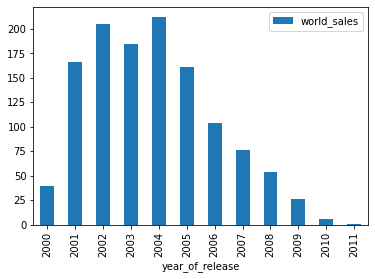

X360


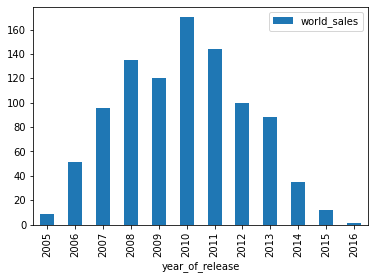

PS3


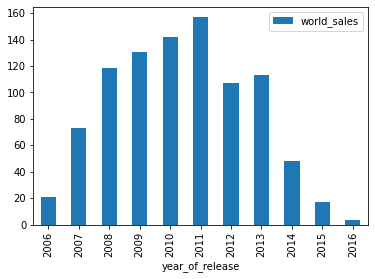

Wii


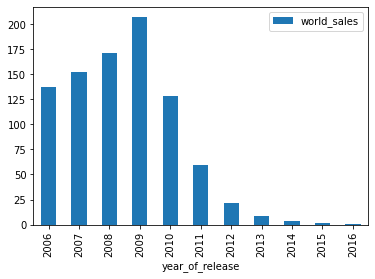

DS


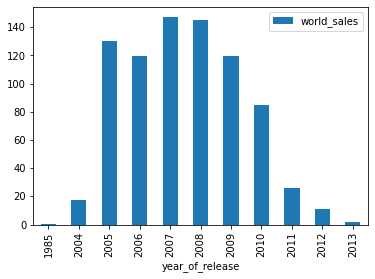

PS


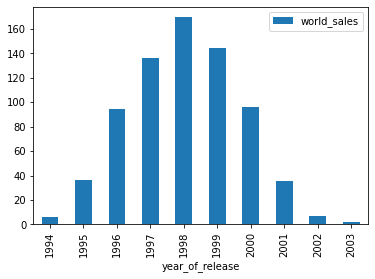

In [18]:
#найдем динамику продаж по платформам

game_platform_pivot_table = pd.pivot_table(game, index = 'platform', values = 'world_sales', aggfunc = 'sum').sort_values('world_sales', ascending = False)
display(game_platform_pivot_table.head(10)) # выберем платформы в которых самые высокие продажи
#посмотрим распределение по годам для кадой платформы
game_platform_sales_pivot_table = pd.pivot_table(game.query('platform in ["PS2","X360","PS3","Wii","DS","PS"]') ,index=['platform','year_of_release'], values='world_sales', aggfunc='sum')
print(game_platform_sales_pivot_table)
#напишем цикл для построения графика распределения продаж по годам в рамках каждой платформы из 6 самых популярных по продажам
for element in game_platform_pivot_table.index[:6]:
    print(element)
    game.query('platform == @element').pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').plot(kind='bar')
    
    plt.show()
    

Вывод: среди всех платформ выделяются первые 6 платформ с наибольшим объемом продаж. Самые большие продажи были отмечены на платформе PS2.
    По графикам распределения продаж также видно, что платформы примерно в течение первых 4-5 лет наращивают объемы продаж, достигнув пика, продажи резко падают вниз. Так к примеру, самая популярная платформа PS2 наращивала продажи с 2001 по 2004 год, а к 2011 году продажи упали практически 0.То есть за 7 лет платформа исчезла.Поэтоиу для самым популярных платформ из списка срок существования 8-12 лет (можно посмотреть смену платформ по популярной платворме PS). На примере платформы PS можно сказать, что она просуществовала с 1994 по 2003 год - 9 лет, новая платформа PS2 появилась спустя 7 лет. Получается, что при появлении игра может 2-3 года существовать на сторой платформе. Все платформы, обладающие максимальными продажами либо перестали существовать, либо заканчивают свое существование (платформа PS3).

Для выбора актуального периода исследования стоит ориентоваться на самую популярную платформу PS. Посмотрим, данные по платформе PS4

In [19]:
game_platform_sales_pivot_table = pd.pivot_table(game.query('platform == "PS4"') ,index=['platform','year_of_release'], values='world_sales', aggfunc='sum')
print(game_platform_sales_pivot_table)

                          world_sales
platform year_of_release             
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25


По данным самой популярной платформы, видно, что следующая платформа PS4 была запущена в 2013 году за три года до исчезнования платформы PS3. На текущий момент платформа PS4 существует уже 4 года, по анализу популрных платформ ранее мы видели, что пик продаж приходится на 5-6 год от начала заупска. Возможно 2017 год может стать пиковым по продажам, так же учитывая тот факт, что плптформа PS3 закончит свое действие , будет только PS4, а игры , которые начали разрабатываться в 2013 году скорее всего в 2017 году будут выпущены. Также не стоит расмматривать тот период в котором развиваются текущие платформы, самые успешные платформы по уровню продаж за весь период, на текущий момент перестали существовать.
Исходя с данных соображений считаю целесообразным ориентироваться на актуальный период для прогнозирования с 2013 по 2016 год вкл.

In [20]:
#Выведем на экран данные по фрему за период с 2013-2016 год.
actual_game = game.query('year_of_release > 2012')
display(actual_game)
actual_game.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,,0.01


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  world_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


,world_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


PS4


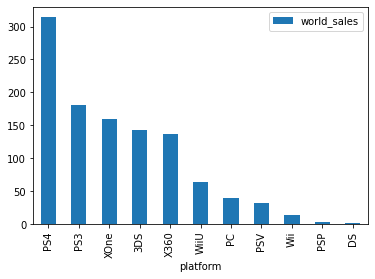

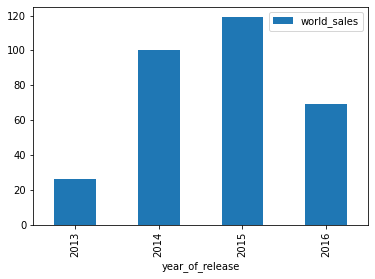

PS3


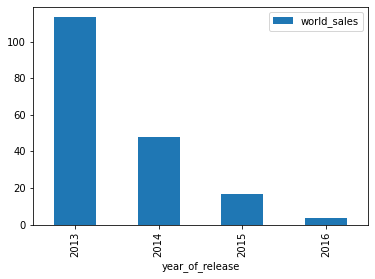

XOne


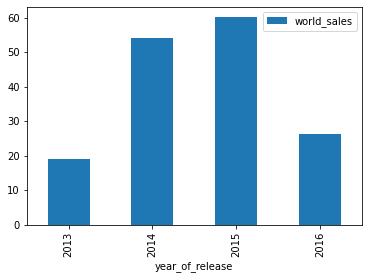

3DS


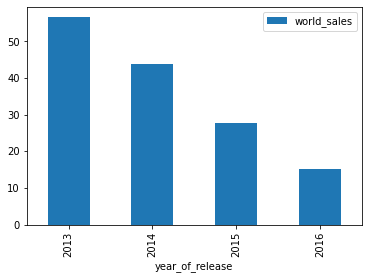

X360


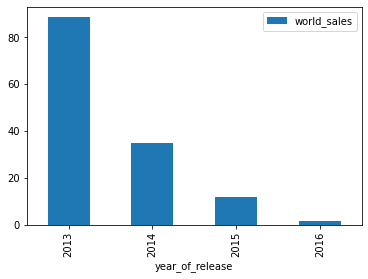

WiiU


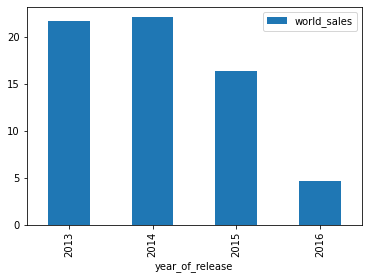

In [21]:
actual_sales_pivot_table = pd.pivot_table(actual_game, index ='platform', values = 'world_sales', aggfunc = 'sum').sort_values('world_sales', ascending = False)
display(actual_sales_pivot_table) # самые высокие продажи имеет платформа PS4, 5-ку лидирующих платформ с точки зрения продаж замыкает платформа -X360
actual_sales_pivot_table.plot(kind ='bar') #наглядное представление.
#посмотрим на динамику продаж по 5 самым популярным платформам в течение рассматриваемого периода. Используем цмкл

for platform in actual_sales_pivot_table.index[:6]:
    print(platform)
    actual_game.query('platform == @platform').pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').plot(kind='bar')
    
    plt.show()


    

Как видно из графиков, по лидирующей платформе PS4 с 2013 по 2015 гг. отмечен рост продаж, в 2016 - падение, такая же тенденция отмечена и у второй по объемам продаж платформы -XOne. Остальные платформы сильно отстают по продажам и показывают стабильно стагнирующую тенденцию за период с 2013 по 2016 г. Среди самых успешных платформ можно выделить: PS4, Xone, WiiU. По графикам видно, что в 2016 году несмотря на снижение продаж они еще находятся на хорошем уровне, что говорит о том, что в 2017 году платформы не исчезнут.


count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: world_sales, dtype: float64

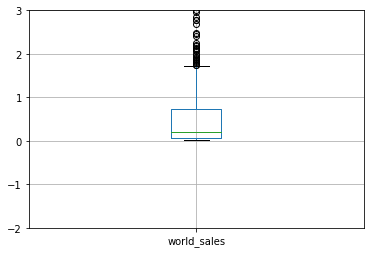

In [22]:
#постороим ящик с усами по трем самым перспективным платформам:PS4, Xone, WiiU, PS3
ps4_actual_game = actual_game.query('platform =="PS4"')
ps4_actual_game.boxplot(column = 'world_sales')
plt.ylim(-2, 3)


ps4_actual_game['world_sales'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: world_sales, dtype: float64

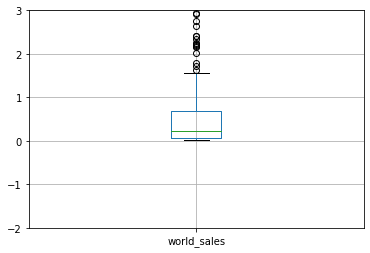

In [23]:
xone_actual_game = actual_game.query('platform =="XOne"')
xone_actual_game.boxplot(column = 'world_sales')
plt.ylim(-2, 3)
xone_actual_game['world_sales'].describe()

count    115.000000
mean       0.562000
std        1.038778
min        0.010000
25%        0.060000
50%        0.200000
75%        0.595000
max        7.090000
Name: world_sales, dtype: float64

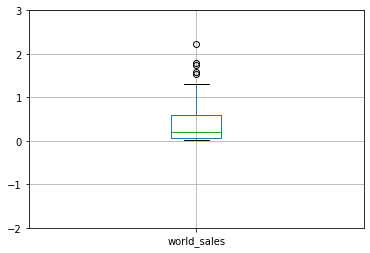

In [24]:
wii_actual_game = actual_game.query('platform =="WiiU"')
wii_actual_game.boxplot(column = 'world_sales')
plt.ylim(-2, 3)
wii_actual_game['world_sales'].describe()

count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: world_sales, dtype: float64

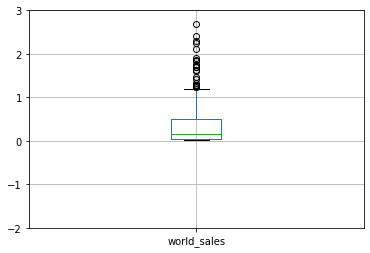

In [25]:
ps3_actual_game = actual_game.query('platform =="PS3"')
ps3_actual_game.boxplot(column = 'world_sales')
plt.ylim(-2, 3)


ps3_actual_game['world_sales'].describe()

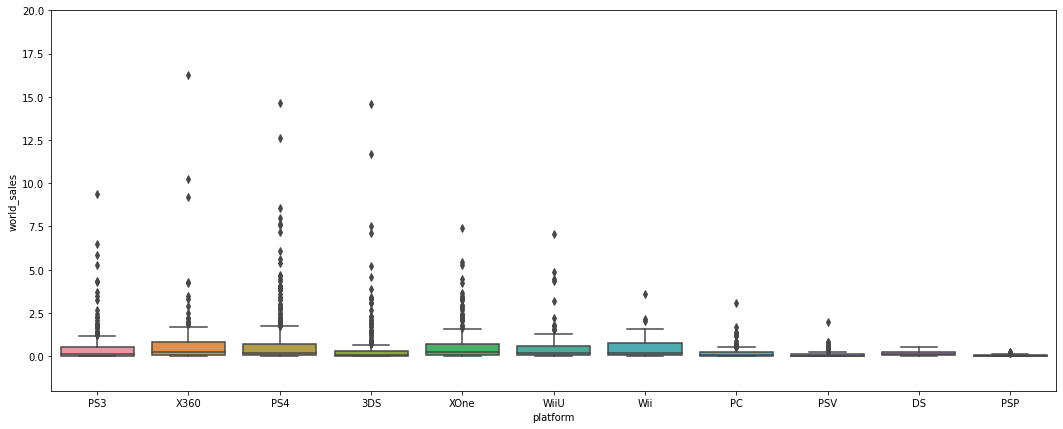

In [26]:

plt.figure(figsize=(18, 7))
sns.boxplot(data = actual_game, x = 'platform', y = 'world_sales')
plt.ylim(-2, 20)
plt.show()


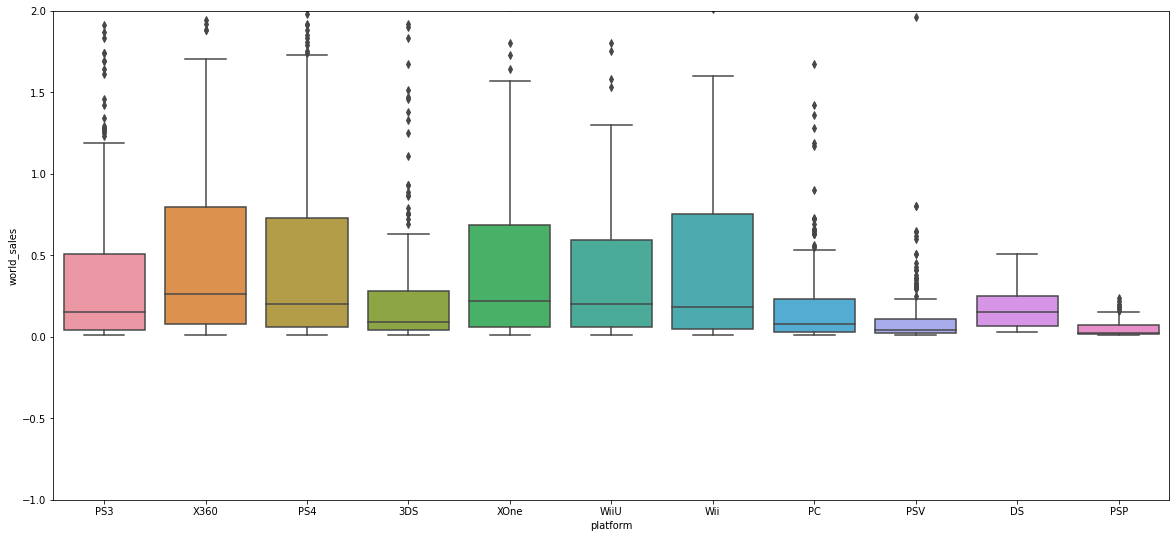

In [27]:
plt.figure(figsize=(20, 9))
sns.boxplot(data = actual_game, x = 'platform', y = 'world_sales')
plt.ylim(-1, 2)
plt.show()

Вывод: по диаграммам размаха видно, что основная доля продаж по всем платформам попадает в интервал до 1 млн. проданных копий, распределение продаж по всем платформам очень схоже.При этом, медианное (большее) значение по каждой платформе находится в промежутке от 0,1 до 0,3 млн. копий.Видно, что медиана по всем платформам бльше тяготеет к первому квартилю,то есть значения , которые отсекает верхний ус встречаются не часто. 
    Относительно самых популярных платформ, основной пул продаж приходится на 1 млн. копий, медианное значение находится на уровне 0,1-0,2 млн.копий(о есть в этот интервал попадают большинство значений продаж игр).По графикам видно, что есть слишком большие выбросы, так для платформы PS4 есть игры по которым продажи на уровне 14,6 млн. копий.

# Влияние отзывов поситителей и оценки критиков на мировые продажи

,world_sales,user_score,critic_score
31,14.63,NaN,NaN
42,12.62,8.3,97.0
77,8.58,4.3,82.0
87,7.98,NaN,NaN
92,7.66,5.7,83.0
...,...,...,...
16500,0.01,7.5,69.0
16503,0.01,NaN,NaN
16526,0.01,7.9,61.0
16530,0.01,5.5,51.0


,world_sales,user_score,critic_score
world_sales,1.000000,-0.031957,0.406568
user_score,-0.031957,1.000000,0.557654
critic_score,0.406568,0.557654,1.000000


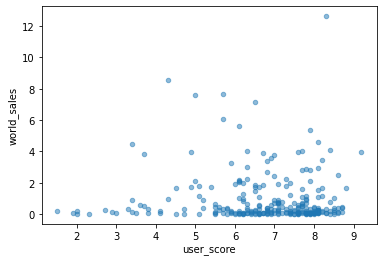

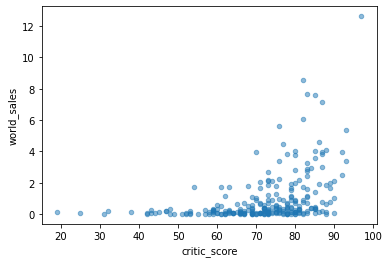

In [28]:
actual_game_PS4 = actual_game.query('platform == "PS4"')
actual_game_PS4.plot(x='user_score', y='world_sales', kind='scatter', alpha = 0.5) # для оценки влияния построим диаграмму рассеивания используя сводную таблицу для сортировки данных в рамках одной платформы

actual_game_PS4.plot(x='critic_score', y='world_sales', kind='scatter', alpha = 0.5)

actual_game_PS4_new = actual_game_PS4.loc[:,['world_sales', 'user_score', 'critic_score']]
display(actual_game_PS4_new)# для расчета коэффициента корреляции
actual_game_PS4_new.corr()


Вывод: по диаграмме размаха видно, что основная часть игр, объем продаж по которым попадает в межквартальный размах, самые частые объемы продаж, оценки как игроков, так и критиков по этим играм достаточно высокие. При этом видно,по диаграмме user есть игры с высокими продажами, но низким рейтингом и наоборот, что говорит об сомнительной зависимости между парметрами продажи и оценка игроков. Об этом говорит коэффициент  корреляции = -0.03(связь обратная очень слабая) 
    
Что качается зависимости между продажами и оценкой критиков она положительная , коэф коррел. = 0.4 (присутствует). Также важно отметить, что на оценку пользователей влияет мнение кретиков. Коэф. коррелиции между параметрами = 0.55. Чем выше оценка критика, тем выше оценка игрока.

,world_sales,user_score,critic_score
16,21.05,8.2,97.0
69,9.36,2.6,71.0
126,6.46,4.3,86.0
149,5.86,9.1,95.0
180,5.27,NaN,NaN
...,...,...,...
16558,0.01,NaN,NaN
16638,0.01,NaN,NaN
16674,0.01,NaN,NaN
16691,0.01,NaN,NaN


,world_sales,user_score,critic_score
world_sales,1.000000,0.002394,0.334285
user_score,0.002394,1.000000,0.599920
critic_score,0.334285,0.599920,1.000000


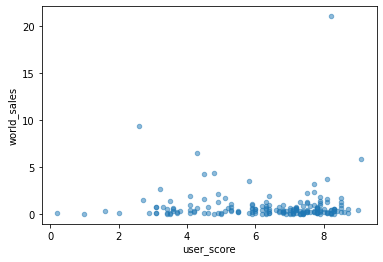

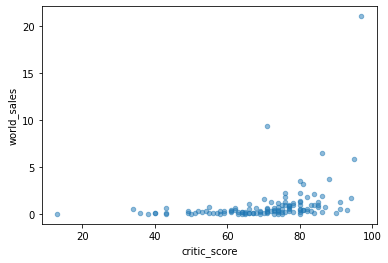

In [29]:
#аналогичная оценка предыдущей по платформе PS3
actual_game_PS3 = actual_game.query('platform == "PS3"')
actual_game_PS3.plot(x='user_score', y='world_sales', kind='scatter', alpha = 0.5) # для оценки влияния построим диаграмму рассеивания используя сводную таблицу для сортировки данных в рамках одной платформы

actual_game_PS3.plot(x='critic_score', y='world_sales', kind='scatter', alpha = 0.5)

actual_game_PS3_new = actual_game_PS3.loc[:,['world_sales', 'user_score', 'critic_score']]
display(actual_game_PS3_new)# для расчета коэффициента корреляции
actual_game_PS3_new.corr()


,world_sales,user_score,critic_score
99,7.39,NaN,NaN
165,5.47,7.9,97.0
179,5.26,5.4,81.0
242,4.49,6.4,84.0
270,4.22,6.2,88.0
...,...,...,...
16630,0.01,8.2,63.0
16643,0.01,6.6,NaN
16645,0.01,NaN,NaN
16660,0.01,6.7,74.0


,world_sales,user_score,critic_score
world_sales,1.000000,-0.068925,0.416998
user_score,-0.068925,1.000000,0.472462
critic_score,0.416998,0.472462,1.000000


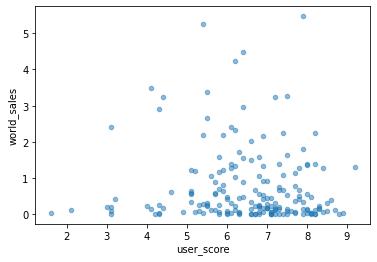

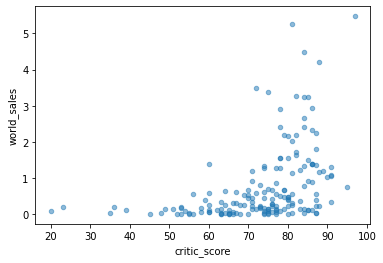

In [30]:
actual_game_xone = actual_game.query('platform == "XOne"')
actual_game_xone.plot(x='user_score', y='world_sales', kind='scatter', alpha = 0.5) # для оценки влияния построим диаграмму рассеивания используя сводную таблицу для сортировки данных в рамках одной платформы

actual_game_xone.plot(x='critic_score', y='world_sales', kind='scatter', alpha = 0.5)

actual_game_xone_new = actual_game_xone.loc[:,['world_sales', 'user_score', 'critic_score']]
display(actual_game_xone_new)# для расчета коэффициента корреляции
actual_game_xone_new.corr()


,world_sales,user_score,critic_score
33,14.60,NaN,NaN
47,11.68,NaN,NaN
96,7.55,NaN,NaN
108,7.14,NaN,NaN
184,5.22,NaN,NaN
...,...,...,...
16608,0.01,NaN,NaN
16610,0.01,NaN,NaN
16648,0.01,NaN,NaN
16668,0.01,NaN,NaN


,world_sales,user_score,critic_score
world_sales,1.000000,0.241504,0.357057
user_score,0.241504,1.000000,0.769536
critic_score,0.357057,0.769536,1.000000


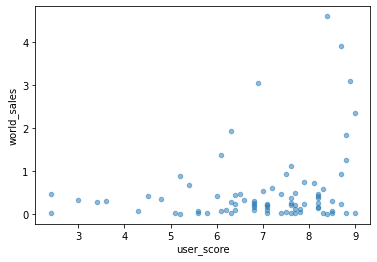

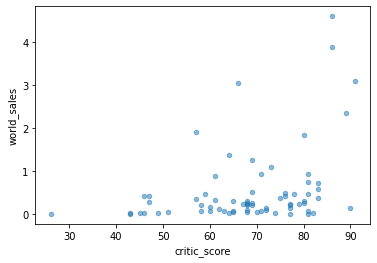

In [31]:
actual_game_3ds = actual_game.query('platform == "3DS"')
actual_game_3ds.plot(x='user_score', y='world_sales', kind='scatter', alpha = 0.5) # для оценки влияния построим диаграмму рассеивания используя сводную таблицу для сортировки данных в рамках одной платформы

actual_game_3ds.plot(x='critic_score', y='world_sales', kind='scatter', alpha = 0.5)

actual_game_3ds_new = actual_game_3ds.loc[:,['world_sales', 'user_score', 'critic_score']]
display(actual_game_3ds_new)# для расчета коэффициента корреляции
actual_game_3ds_new.corr()

,world_sales,user_score,critic_score
23,16.27,8.1,97.0
60,10.24,2.6,73.0
72,9.18,NaN,NaN
263,4.28,4.9,NaN
271,4.22,4.2,84.0
...,...,...,...
16301,0.01,NaN,NaN
16450,0.01,4.5,NaN
16460,0.01,6.2,NaN
16491,0.01,NaN,NaN


,world_sales,user_score,critic_score
world_sales,1.000000,-0.011742,0.350345
user_score,-0.011742,1.000000,0.520946
critic_score,0.350345,0.520946,1.000000


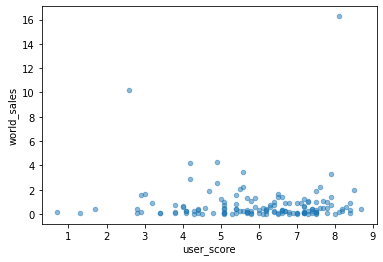

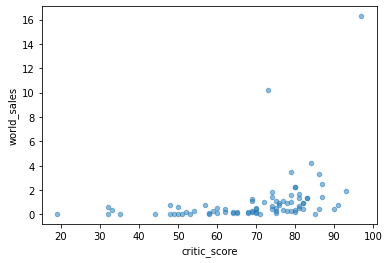

In [32]:
actual_game_x360 = actual_game.query('platform == "X360"')
actual_game_x360.plot(x='user_score', y='world_sales', kind='scatter', alpha = 0.5) # для оценки влияния построим диаграмму рассеивания используя сводную таблицу для сортировки данных в рамках одной платформы

actual_game_x360.plot(x='critic_score', y='world_sales', kind='scatter', alpha = 0.5)

actual_game_x360_new = actual_game_x360.loc[:,['world_sales', 'user_score', 'critic_score']]
display(actual_game_x360_new)# для расчета коэффициента корреляции
actual_game_x360_new.corr()

Вывод: что касается остальных популярных платформ, то, взаимосвязь между объемом продаж и оценками игроков и критиков похожа. Выделяется платформа 3DS тем что коэф. корреляции между объемом продаж и оценками игроков существенно положительный - 0,35. Существует положительная зависимость объема продаж как от оценок игроков, так и оценок критикиво, при этом оценки игроков очень существенно зависят от оценок критиков. Возможно степень вовлеченности игков на данной платформе больше: оценки собираются чаще и лучше. Ведется хорошее взаимодействие с играками относительно обратной связи, возможно сами игры достаточно интереснф игракам, данный интерес попуждает давать обратную связть относительно игры больше и лучше.

,world_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


<AxesSubplot:xlabel='genre'>

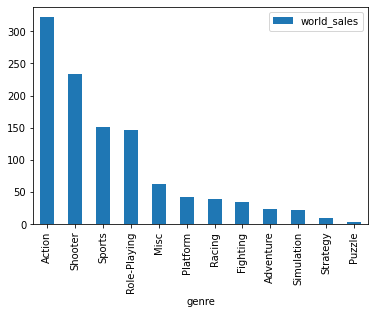

In [33]:
#общее распределение игр по жанрам
actual_game_genre = actual_game.pivot_table(index = 'genre', values = 'world_sales', aggfunc = 'sum').sort_values('world_sales', ascending = False)
display(actual_game_genre)
actual_game_genre.plot(kind = 'bar')


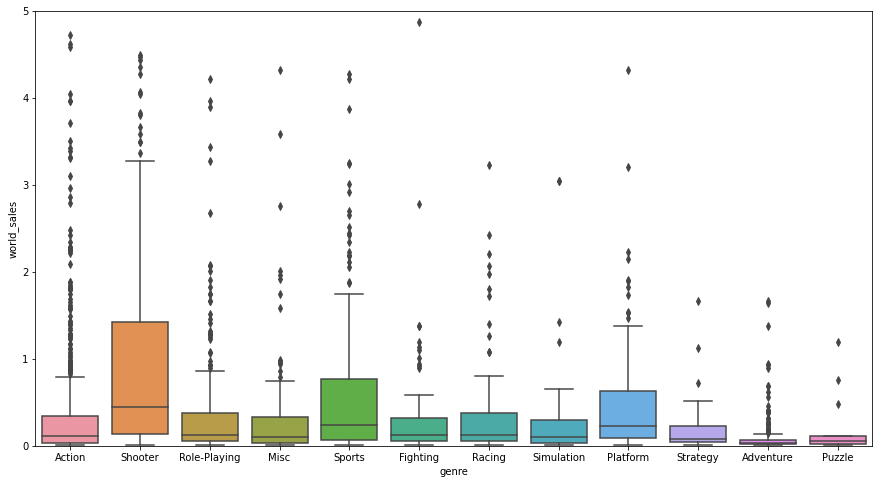

In [34]:
plt.figure(figsize=(15, 8))
sns.boxplot(data = actual_game, y = 'world_sales', x='genre')

plt.ylim(0, 5)

plt.show()

Вывод: самые популярные жанры игр Action и Shoooter, самые не популярные - Puzzle. Спортивные и ролевые игры также достаточно популярны. Что касается распределения продаж по жанрам, то жанр Shooter имеет самое высокое значение медианы продаж. Межквартальный размах самый большой.Неплохие результаты  по продажам также показывают и  жанры sports, platform. 
    Рассматриваемые жанры являются популярными учитывая то, что игрокам больше нравятся динамически игры, в которых можно развивать какие-либо навыки, проходить куровни сложности, завоевывать или достигать какую-либо цель. Также к примеру спортивные игры предполагают участие нескольких игроков, то есть совместные игры тоже популярны.

# 4. Портрет пользователя каждого региона

In [35]:
actual_game_na_sales =  pd.pivot_table(actual_game, index='platform', values='na_sales',aggfunc='sum').sort_values('na_sales', ascending=False)
display(actual_game_na_sales) # выведем на экран таблицу самых популярных платформ в каждом регионе

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


In [36]:
actual_game_jp_sales =  pd.pivot_table(actual_game, index='platform', values='jp_sales',aggfunc='sum').sort_values('jp_sales', ascending=False)
display(actual_game_jp_sales)

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88
PSP,3.29
X360,0.51
XOne,0.34
Wii,0.05


In [37]:
actual_game_eu_sales =  pd.pivot_table(actual_game, index='platform', values='eu_sales',aggfunc='sum').sort_values('eu_sales', ascending = False)

display(actual_game_eu_sales)

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
PC,25.36
WiiU,19.85
PSV,6.10
Wii,5.93


,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20
5,WiiU,29.21
6,PC,11.11
7,Wii,6.56
8,PSV,5.04
9,DS,0.57


<BarContainer object of 11 artists>

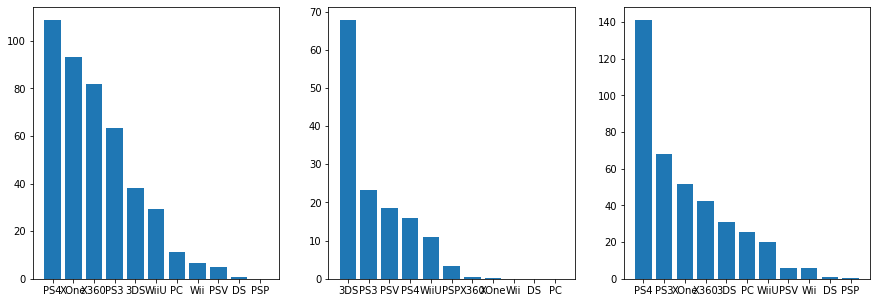

In [38]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

actual_game_na_sales =  pd.pivot_table(actual_game, index='platform', values='na_sales',aggfunc='sum').sort_values('na_sales', ascending=False).reset_index()
 
actual_game_jp_sales =  pd.pivot_table(actual_game, index='platform', values='jp_sales',aggfunc='sum').sort_values('jp_sales', ascending=False).reset_index()
 
actual_game_eu_sales =  pd.pivot_table(actual_game, index='platform', values='eu_sales',aggfunc='sum').sort_values('eu_sales', ascending = False).reset_index()

display(actual_game_na_sales)
axs[0].bar(actual_game_na_sales['platform'], actual_game_na_sales['na_sales'])
axs[1].bar(actual_game_jp_sales['platform'], actual_game_jp_sales['jp_sales'])
axs[2].bar(actual_game_eu_sales['platform'], actual_game_eu_sales['eu_sales'])



Вывод:
    Самые популярные платформы (топ-5) среди регионов:
        Америка:PS4, XOne,X360, PS3,3DS
        Европейский рынок:PS4, PS3, XOne,X360,3DS
        Япония:3DS, PS3, PSV, PS4,WiiU
Разница между регионами в предпочтении платформ обусловлено прежде всего масштабом присутствия той или иной компании в регионе и родиной самой компании-производителя. Самые известные платформы принадлежащие компании Sony популярны на всех континентах, так как сама компания Sony общепризнаный мировой бренд. 
на втром месте по узнаваемости идет платформа XOne компании Microsoft,она наиболее популярна в стране производителя -США. Платформа 3DS - Японского производителя Nintendo, логично, что наибольшую популярность платформа достигла в Японии.
Так же важно ометить, что платформы PS одни из самых старых, первые PS появились в 1994 году, за многие годы компания Sony добилась мирового признания.
По американскому рынку видно , что разница в продажах  между платформами Sony и Microsoft незначительная, скорее данные производители составляют другу серьезную конкуренцию.Европейский рынок в этом отношении достаточно спокоен, в нем нет крупных локальных производителей, поэтому они чаще всего выбирают платформу мирового бренда Sony, несколько десятилетий зарекомендовавшего себя на рынке.

In [39]:
actual_game_na_genre =  pd.pivot_table(actual_game, index='genre', values='na_sales',aggfunc='sum').sort_values('na_sales', ascending=False)
display(actual_game_na_genre) # выводим данные по самым популярным жанрам в каждом регионе

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


In [40]:
actual_game_eu_genre =  pd.pivot_table(actual_game, index='genre', values='eu_sales',aggfunc='sum').sort_values('eu_sales', ascending=False)
display(actual_game_eu_genre) 

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


In [41]:
actual_game_jp_genre =  pd.pivot_table(actual_game, index='genre', values='jp_sales',aggfunc='sum').sort_values('jp_sales', ascending=False)
display(actual_game_jp_genre) 

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49
5,Platform,18.14
6,Fighting,15.55
7,Racing,12.96
8,Adventure,7.14
9,Simulation,4.86


<BarContainer object of 12 artists>

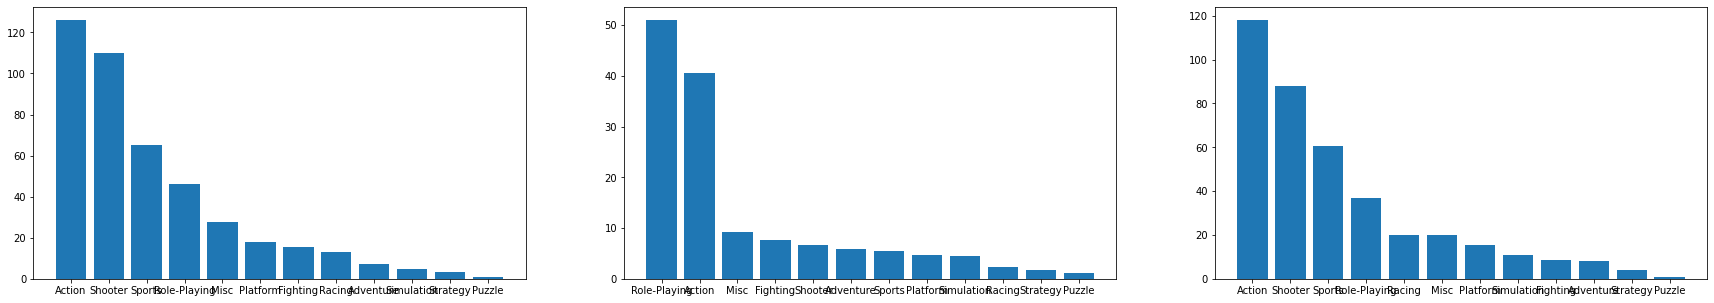

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(30, 5))

actual_game_na_genre =  pd.pivot_table(actual_game, index='genre', values='na_sales',aggfunc='sum').sort_values('na_sales', ascending=False).reset_index()
 
actual_game_eu_genre =  pd.pivot_table(actual_game, index='genre', values='eu_sales',aggfunc='sum').sort_values('eu_sales', ascending=False).reset_index()
 
actual_game_jp_genre =  pd.pivot_table(actual_game, index='genre', values='jp_sales',aggfunc='sum').sort_values('jp_sales', ascending = False).reset_index()

display(actual_game_na_genre)

axs[0].bar(actual_game_na_genre['genre'], actual_game_na_genre['na_sales'])
axs[1].bar(actual_game_jp_genre['genre'], actual_game_jp_genre['jp_sales'])
axs[2].bar(actual_game_eu_genre['genre'], actual_game_eu_genre['eu_sales'])



Вывод: по американскому и европейскому самые популярные жанры являются одинаковыми :Action, Shooter, sports, role-playing,racing или misc. При этом, даже объемы продаж в каждом жанре примерно одинаковы по двум регионам. Японская аудиттория предпочитает игры следующих жанров: role-playing, action,misc,fighting. 
            Значительное отличие от западных игроков обусловлено прежде всего культурой региона, японскую аудиторию больше привлекают игры с более сложным сюжетом, сюжет заточен создания чего-либо. Однако, можно отметить что жанр action популярен в каждом регионе

In [43]:
#посмотрим влияние рейтинга на продажи по каждои=му региону
na_rating_actual_game = pd.pivot_table(actual_game, index='rating', values='na_sales',aggfunc='sum').sort_values('na_sales', ascending=False)
display(na_rating_actual_game)

,na_sales
rating,
M,165.21
,89.42
E,79.05
E10+,54.24
T,49.79


In [44]:
eu_rating_actual_game = pd.pivot_table(actual_game, index='rating', values='eu_sales',aggfunc='sum').sort_values('eu_sales', ascending=False)
display(eu_rating_actual_game)

,eu_sales
rating,
M,145.32
E,83.36
,78.91
E10+,42.69
T,41.95


In [45]:
jp_rating_actual_game = pd.pivot_table(actual_game, index='rating', values='jp_sales',aggfunc='sum').sort_values('jp_sales', ascending=False)
display(jp_rating_actual_game)

ESRB = actual_game.pivot_table(index = 'rating', values = ['eu_sales','jp_sales','na_sales'], aggfunc = 'sum')
ESRB

,jp_sales
rating,
,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


,eu_sales,jp_sales,na_sales
rating,,,
,78.91,85.05,89.42
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
T,41.95,20.59,49.79


<AxesSubplot:ylabel='sum'>

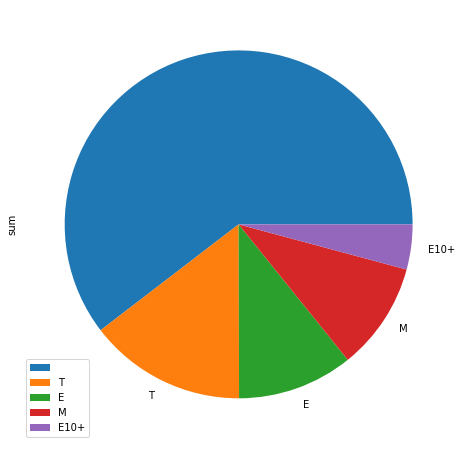

In [46]:
jp_rating_actual_game.columns = ['sum']
jp_rating_actual_game.plot(y = 'sum', kind = 'pie', figsize = (8,8))

<AxesSubplot:ylabel='sum'>

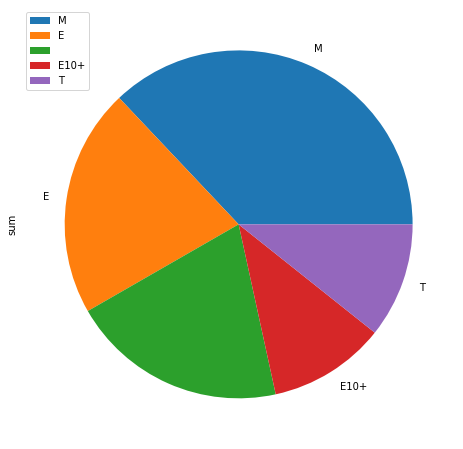

In [47]:
eu_rating_actual_game.columns = ['sum']
eu_rating_actual_game.plot(y = 'sum', kind = 'pie', figsize = (8,8))

<AxesSubplot:ylabel='sum'>

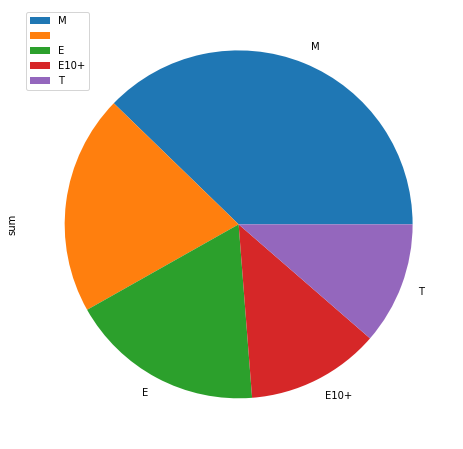

In [48]:
na_rating_actual_game.columns = ['sum']
na_rating_actual_game.plot(y = 'sum', kind = 'pie', figsize = (8,8))


,rating,jp_sales
0,,85.05
1,T,20.59
2,E,15.14
3,M,14.11
4,E10+,5.89


([<matplotlib.patches.Wedge at 0x7f85f57405e0>,
 [Text(0.4131438418447951, 1.019466608548668, 'M'),
  Text(-1.0909647035351955, 0.14069831427690727, ''),
  Text(-0.5175808243265353, -0.9706235574564757, 'E'),
  Text(0.49501278181476677, -0.9823249695696462, 'E10+'),
  Text(1.030506132700097, -0.38478189986990013, 'T')])

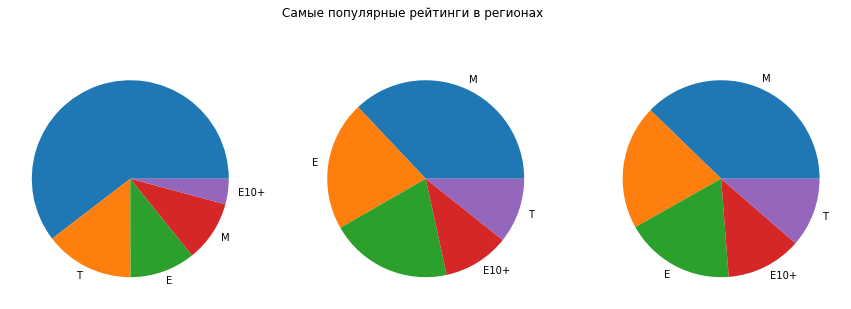

In [49]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Самые популярные рейтинги в регионах')

jp_rating_actual_game = pd.pivot_table(actual_game, index='rating', values='jp_sales',aggfunc='sum').sort_values('jp_sales', ascending=False).reset_index()
na_rating_actual_game = pd.pivot_table(actual_game, index='rating', values='na_sales',aggfunc='sum').sort_values('na_sales', ascending=False).reset_index()
eu_rating_actual_game = pd.pivot_table(actual_game, index='rating', values='eu_sales',aggfunc='sum').sort_values('eu_sales', ascending=False).reset_index()

display(jp_rating_actual_game)

axs[0].pie(jp_rating_actual_game['jp_sales'], labels = jp_rating_actual_game ['rating'])


axs[1].pie(eu_rating_actual_game['eu_sales'], labels = eu_rating_actual_game ['rating'])


axs[2].pie(na_rating_actual_game['na_sales'], labels = na_rating_actual_game ['rating'])



Вывод:
    Говоря о поппулярности игр в соответсиви с рейтингом ESRB важно отметить, что на американком и европейском рынках самыми популярными являются игры для взрослых -M 'Mature', на втором месте по популярности расположены игры для всех категорий игроков - универсальные. 
    Японский рынок координально отличается от американского и европейского, большую долю популярных игр занимают игры без рейтинга. Учитывая, что рейтинг ERSB присваивается американскими компаниями, то скорее всего игры без рейтинга-это те игры, которые произведены именно в Японии.В Японии есть своя система оценивания - CERO. Популярность игр без рейтинга говорит о том, что все-таки японцы предпочитают именно локальный продукт, то есть там он особенным обрузом популеризируется.
    


# Итоговый вываод по 4-му шагу


Проанализировав данные по регионам можно сформировать портрет игроков для каждого региона:
    1.американский игрок возраста 18+ предпочитает платформы разрабодчиков Microsoft и Sony, игры в рамках домашней обстановки Самыми привлекательными жанрами ждля него являются жанры Action и Shooter.

    2. европейский игрок возраста 18+, предпочитает платформу PS разработчика Sony, игры в рамках домашней обстановки. Самыми привлекательными жанрами для себя, европейский игрок выбирает жанры Action и Shooter.
    3. Японский игрок возраста 14 лет (подросток), предпочитает локальную платформу, произведенную в Японии, самыми привлекательными жанрами для себя выбирает RPG и Action. Скорее всего предпочитает игры в каком-то игровом пространстве, коллективнфе игры.

# 5.Проверка гипотиз


Определим гипотезы H0 и H1:
гтпотеза H0: средние пользоватеьские рейтинги платформ XOne и PC равны, 
гипотеза H1 (альтернативная): средние пользоватеьские рейтинги платформ XOne и PC не равны

В данном случае мы будеи проверять равенство средних двух гениральных совокупностей ирг платформ PC и XOne .
Так как мы рассматриваем две генеральные сосокупности и будем сравнивать средние значения выборка, взятых из этих ген. совокупностей, то будем использовать метод scipy.stats.ttest_ind 

In [50]:

alpha = 0.01 #критический уровень статистической значимости 1%, если p-value меньше этого значения, то гпотезу отвергаем

results = st.ttest_ind(actual_game.query('platform == "PC"')['user_score'],
    actual_game.query('platform == "XOne"')['user_score'], 
    equal_var = False, nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.1475959401343032
Не получилось отвергнуть нулевую гипотезу


In [51]:
#найдем средние рейтинги для каждой платформы вручную.
print('Средний пользовательский рейтинг платформ XOne', actual_game.query('platform == "XOne"')['user_score'].mean())
print('Средний пользовательский рейтинг платформ PC', actual_game.query('platform == "PC"')['user_score'].mean())

Средний пользовательский рейтинг платформ XOne 6.521428571428572
Средний пользовательский рейтинг платформ PC 6.269677419354839


Вывод: действительно рейтинги очень близки по своим значениям, то есть у нас нет оснований полагать, что разница между значениями средних рейтингов является статистически значимой. Вероятность случайно получить такое различие между рейтингами равна 14,7%

# Проверяем гипотезу от том, что средние рейтинги жанров Action и Sports не одинаковые

Определим гипотезы H0 и H1:
гтпотеза H0: средние пользоватеьские рейтинги по жанрам Action и Sports - равны, 
гипотеза H1 (альтернативная): средние пользоватеьские рейтинги по жанрам Action и Sports не равны

В данном случае мы будеи проверять равенство средних двух гениральных совокупностей игр жанров Action и Sports.

In [52]:
alpha = 0.01 #критический уровень статистической значимости 1%, если p-value меньше этого значения, то гпотезу отвергаем
results = st.ttest_ind(actual_game.query('genre == "Action"')['user_score'],
    actual_game.query('genre == "Sports"')['user_score'], 
    equal_var = False, nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    
    
print('Средний пользовательский рейтинг жанра Action', actual_game.query('genre == "Action"')['user_score'].mean())
print('Средний пользовательский рейтинг жанра Sports', actual_game.query('genre == "Sports"')['user_score'].mean())  

p-значение: 1.4460039700703482e-20
Отвергаем нулевую гипотезу
Средний пользовательский рейтинг жанра Action 6.837532133676093
Средний пользовательский рейтинг жанра Sports 5.238124999999999


Вывод: Действительно рейтинги являются статистически значимо различными, поэтому гипотезу H0 о равенстве средних рейтингов смело можно отвергнуть.

# 6. Общий вывод по проекту

Была произведена: работа по приведению названий столбцов к нижнему регистру, по приобразованию данных в нужные типы данных. Так же мной была предоставлена информация, почему необходимо было заменить типы данных в некоторых столбцах. 
Далее были обработаны пропуски данных, там, где это было воозможно. По значению 'tbd' также была проведена необходимая обратока. Был сформирован отедьный столбец с суммарными продажами по всем регионам. 

Самыми топовыми платформами по объему продаж игр были:

PS2,
X360,
PS3,
Wii,
DS,
PS.

Срок существования платформы от 8 до 12 лет.

Из проведенного анализа можно сделать вывод, что объем продаж игр зависит от следующих парметров: наименование платформы, жанр игры, рейтинг ESRB:

Самыми популярными платформами в мире являются платформы разработчиков - Sony и Microsoft. Популярность той или иной платформы в регионах, кроме силы бренда компании-разрабодчика, в большей степени зависит от того, где эта платформа разрабатывалась. Так для американцев в приоритете платформы, разработанные Microsoft, для европейцев в связи с отсутвием локального разработчика - платформы фирмы Sony, для японцев - локальные платформы типа 3DS.

Анализ влияния отзыв игроков и оценки критиков на мировые продажи показал:
Оценка зависимости с  точки знения продаж PS4 можно отметить:
- в основном, игры с хорошими продажами имеют хорошие оценки игроков и достаточно высокие оценки критиков, при этом говоря о зависимости оценок игроков и уровнем продаж, можно сказать, что есть игры которые имеют высокие продажи, но при этом низкие оценки игроков, поэтому зависимость объема продаж компьютерных игр от оценок игр можно исключить;
- зависимость между уровнем продаж и оценкой критиков существует, она положительная, коэффициент корреляции = 0,4
- прослеживается существенная зависимость между оценкой игроков и оценкой критиков. Чем выше оценка критика, тем выше оценка игрока конкретной игры. (коэф. корреляции =0.55)

Остальные популярные платформы:

что касается остальных популярных платформ, то, взаимосвязь между объемом продаж и оценками игроков и критиков похожа на платформц PS4

Выделяется платформа 3DS тем что коэф. корреляции между объемом продаж и оценками игроков существенно положительный (0,35). Существует положительная зависимость объема продаж как от оценок игроков, так и оценок критикиво, при этом оценки игроков очень существенно зависят от оценок критиков. Возможно степень вовлеченности игков на данной платформе намного больше: оценки собираются чаще и лучше. Ведется хорошее взаимодействие с играками относительно обратной связи, возможно сами игры достаточно интереснф игракам, данный интерес попуждает давать обратную связть относительно игры больше и лучше.

Американские игроки и европейские схожи в соих вкусовых предпочтениях относительно жанров игр. В их регионах одинаково популярны жанры Action и Shooter. Японские игроки предпочитают в большей степени жанр Role-Playing. Однако жанр action популярен в каждом регионе.

Самыми продаваемыми играми в америке и европе являются игры для взрослых и игры для любого возраста, японии самыми популярными играми, я вляются игры локального производства, которые не оцениваются рейтингом ERBS (американской рейтинговой системы игр), на втором месте по популярности выступают игры для тинейджеров.

Игроки отдают предпочтения платформам, рарабодчики которых достаточно давно присутствуют на рынке. За многие годы присутвия на рынке эти компании собрали свою аудиторию, меено для них они разрабатывают соответсвующие игры , совершентсвуют продукт. Такие компании можно назвать мастодонты индустрии компьютерных игр. 


Основные принципы для компании на 2017 год:

- будут продаваться игры на относительно свежих платформам, таких как PS4, XOne, 3DS
- игроки будут покупать игры наиболее полюбившихся жанров , таких как :Action, Shooter, Sports
- игры должны учитывать основной возрастной сегмент игроков: наиболее продаваемые игры 18+, либо универсальные, для всех возрастов
- игра должны быть максимально адаптирована для нескольких устройств, кроме игровых приставок, также на PC.



